<a href="https://colab.research.google.com/github/Nimisha-Nooti/Healthcare-Analytics-Practicum/blob/main/PracticumFinalProject_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MS PRACTICUM - CAPSTONE PROJECT : Modeling Public Health Risk Across New York Counties: A Data-Driven Approach
By :- Rahul Jaiswal & Nimisha Nooti

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MS PRACTICUM/Mspracticumfinalmergeddata.csv')
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   County                           55 non-null     object 
 1   Avg_LOS                          55 non-null     float64
 2   Avg_Charges                      55 non-null     float64
 3   Avg_Costs                        55 non-null     float64
 4   Hospitalizations                 55 non-null     int64  
 5   Median_Income                    55 non-null     int64  
 6   Health_Insurance_Coverage        55 non-null     int64  
 7   Education_Total                  55 non-null     int64  
 8   New_Positives                    55 non-null     int64  
 9   Total_Tests                      55 non-null     int64  
 10  Positive_Rate                    55 non-null     float64
 11  SVI_Composite                    55 non-null     float64
 12  SVI_Econ                

,0
County,0
Avg_LOS,0
Avg_Charges,0
Avg_Costs,0
Hospitalizations,0
Median_Income,0
Health_Insurance_Coverage,0
Education_Total,0
New_Positives,0
Total_Tests,0


In [ ]:
df['Positive_Rate'] = pd.to_numeric(df['Positive_Rate'], errors='coerce')
df['Positive_Rate'].fillna(df['Positive_Rate'].median(), inplace=True)


<ipython-input-29-2db57f349f8f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Positive_Rate'].fillna(df['Positive_Rate'].median(), inplace=True)


In [ ]:
# features enginnering for analysis
df['Hosp_per_100k'] = df['Hospitalizations'] / df['Population_2024'] * 100000
df['Deaths_per_100k'] = df['Total_COVID_Deaths'] / df['Population_2024'] * 100000
df['Charges_to_Costs_Ratio'] = df['Avg_Charges'] / df['Avg_Costs']
df['Uninsured_Rate'] = 100 - df['Health_Insurance_Coverage']
df['High_Risk'] = (df['Positive_Rate'] > df['Positive_Rate'].median()).astype(int)


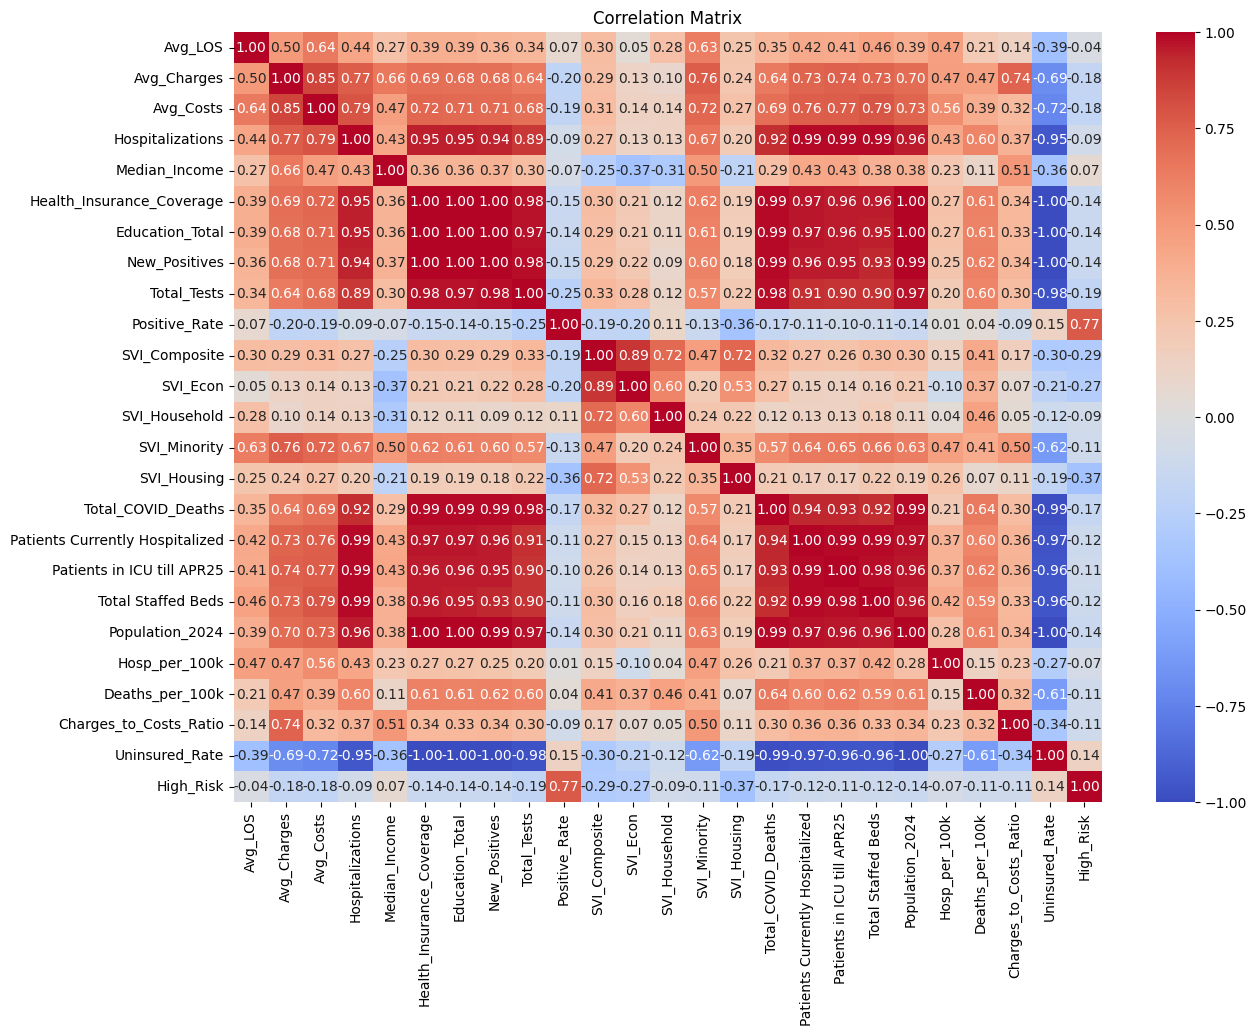

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


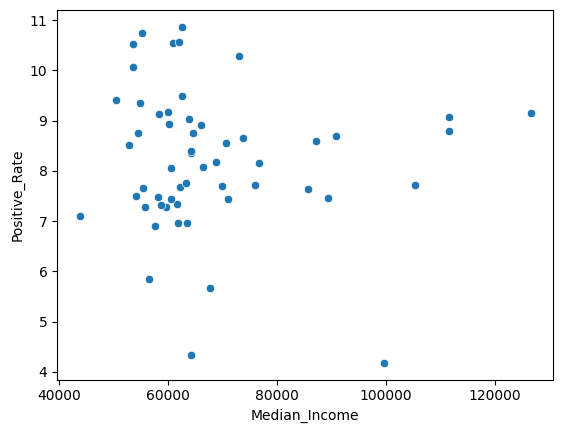

In [ ]:

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Proceed with the scatterplot (this part likely won't cause an error)
sns.scatterplot(data=df, x='Median_Income', y='Positive_Rate')
plt.show()  # Add this line to display the scatterplot

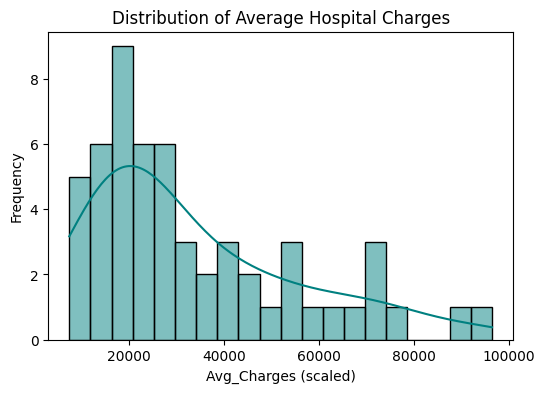

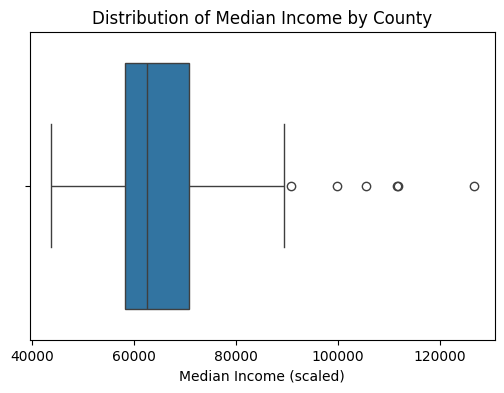

In [ ]:

# Histogram of Average Charges
plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Charges'], kde=True, bins=20, color='teal')
plt.title('Distribution of Average Hospital Charges')
plt.xlabel('Avg_Charges (scaled)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Median Income
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Median_Income'])
plt.title('Distribution of Median Income by County')
plt.xlabel('Median Income (scaled)')
plt.show()

In [ ]:
features = ['Avg_LOS', 'Avg_Charges', 'Avg_Costs', 'Hosp_per_100k',
            'Uninsured_Rate', 'Median_Income', 'SVI_Composite',
            'SVI_Econ', 'SVI_Minority']
X = df[features]
y = df['High_Risk']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report



In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
log_prob = log_model.predict_proba(X_test_scaled)[:,1]

# K-Nearest Neighbors (K=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)[:,1]

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:,1]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n🔍 {name} Evaluation Metrics:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))
    print("ROC AUC:", round(roc_auc_score(y_true, y_prob), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Run evaluations
evaluate_model("Logistic Regression", y_test, log_pred, log_prob)
evaluate_model("K-Nearest Neighbors", y_test, knn_pred, knn_prob)
evaluate_model("XGBoost Classifier", y_test, xgb_pred, xgb_prob)



🔍 Logistic Regression Evaluation Metrics:
Accuracy: 0.529
Precision: 0.75
Recall: 0.3
F1 Score: 0.429
ROC AUC: 0.471

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       0.75      0.30      0.43        10

    accuracy                           0.53        17
   macro avg       0.61      0.58      0.51        17
weighted avg       0.63      0.53      0.50        17


🔍 K-Nearest Neighbors Evaluation Metrics:
Accuracy: 0.471
Precision: 0.571
Recall: 0.4
F1 Score: 0.471
ROC AUC: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.57      0.40      0.47        10

    accuracy                           0.47        17
   macro avg       0.49      0.49      0.47        17
weighted avg       0.50      0.47      0.47        17


🔍 XGBoost Classifier Evaluation Metrics:
Accuracy: 0.588
Pr

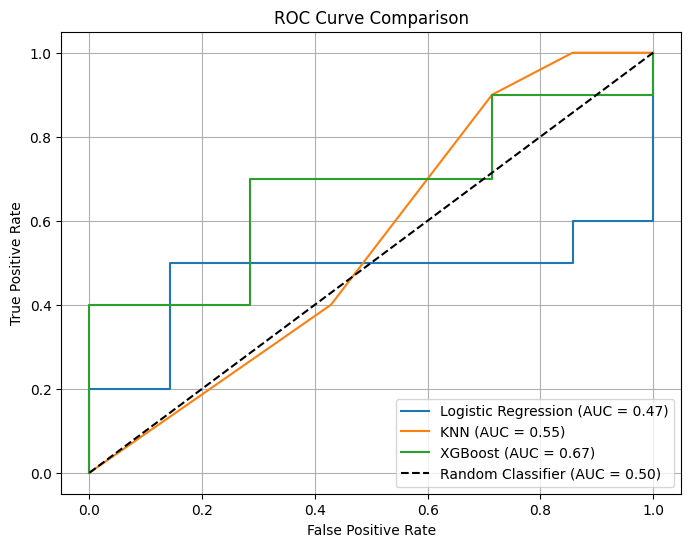

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Add random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

# Plot settings
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Assuming your processed DataFrame is called df
df.to_csv('final_healthcare_data.csv', index=False)


In [ ]:
df['County'] = df['County'].str.strip() + ' County'
df.to_csv('final_healthcare_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('final_healthcare_data.csv')  # prompts download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>